In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import table
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

In [3]:
# set maximum number of columsn to be displayed
pd.set_option("display.max_columns", 100)

In [4]:
train = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


TotalCharges should be numerical but it is an object here

In [6]:
train["TotalCharges"] = train["TotalCharges"].apply(pd.to_numeric, errors="coerce")

In [7]:
train.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# 1. check missing values

In [8]:
train.isna().sum()
# there is no missing values

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# 2. Data Visualization Understanding

### Churn 

In [9]:
def plot_stacked_bar(dataframe, title_, size_ = (18,10), rot_=0, legend_ = "uppder right"):
    plt.subplot(5,3,i)
    ax = dataframe.plot(kind="bar", stacked = True, figsize = size_, rot = rot_, title = title_)
    annotate_stacked_bars(ax, textsize = 14)
    plt.legend(["Retention", "Churn"], loc = legend_)
    plt.show()
def annotate_stacked_bars(ax,pad = 0.99, colour="white", textsize=13):
    for p in ax.patches:
        value = str(round(p.get_height(),1))
        if value == "0.0":
            continue
        ax.annotate(value, ((p.get_x()+p.get_width()/2)*pad-0.05,
                           (p.get_y()+p.get_height()/2)*pad),
                   color = colour, size = textsize,)

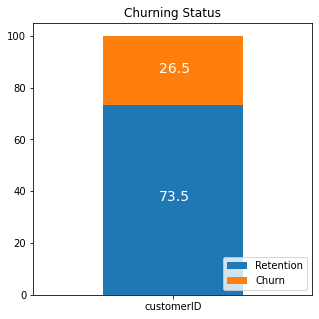

In [10]:
churn = train[['customerID', "Churn"]]
churn_total = churn.groupby(churn["Churn"]).count()
churn_percentage = churn_total/churn_total.sum()*100
plot_stacked_bar(churn_percentage.transpose(), "Churning Status", (5,5), legend_="lower right")


There is 26.5% of the total cusotmers have churned

### Categorical Features Data Understanding

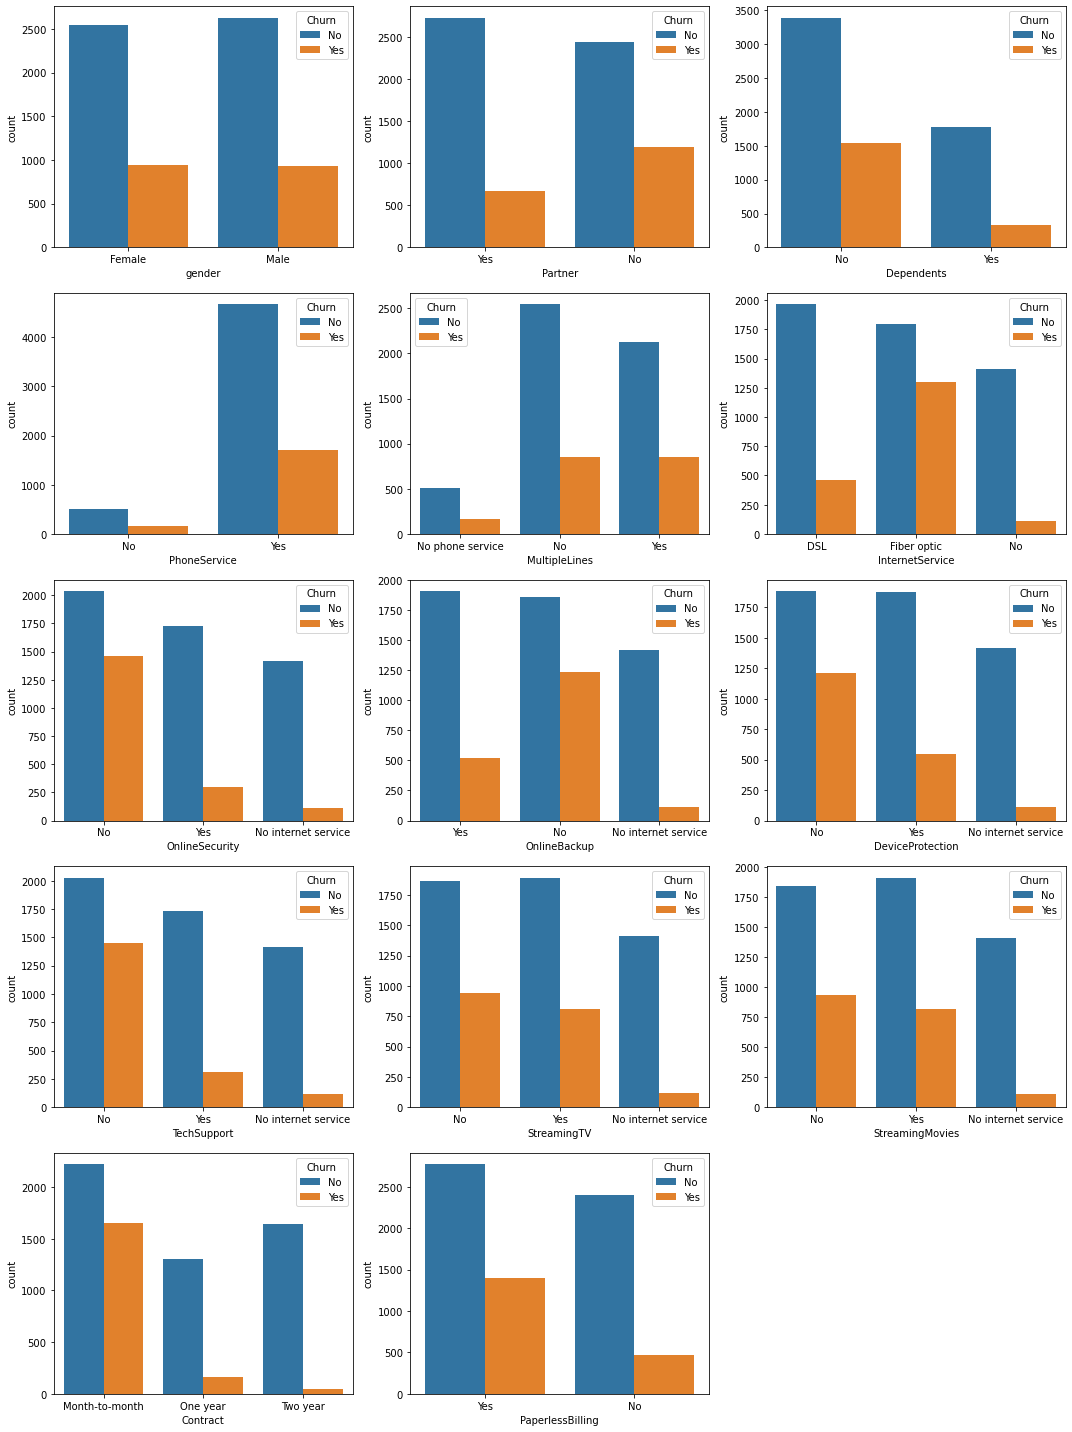

In [11]:
categorical_features = train.select_dtypes(include="object")
plt.figure(figsize=(15,20))
i = 1
for col_name in categorical_features.columns[1:15]:
    plt.subplot(5,3,i)
    sns.countplot(categorical_features[col_name],hue=categorical_features['Churn'])
    i +=1
    plt.tight_layout()

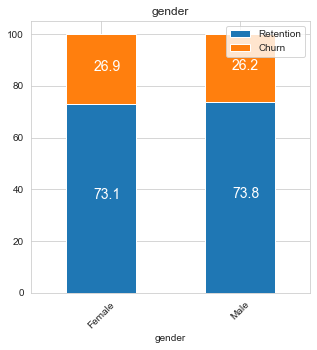

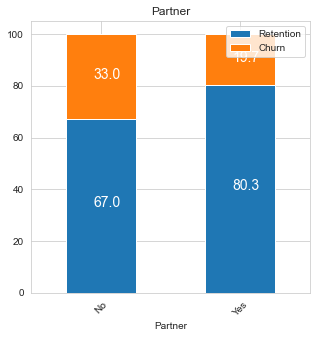

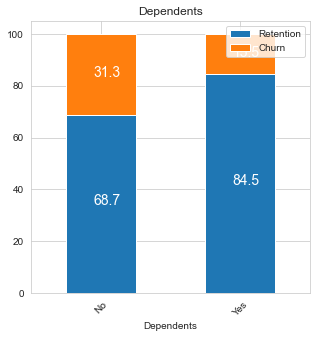

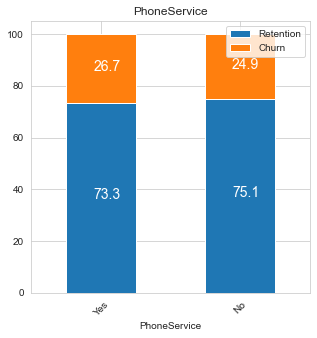

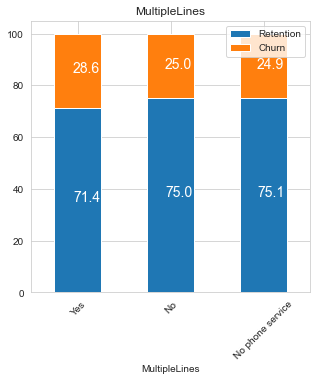

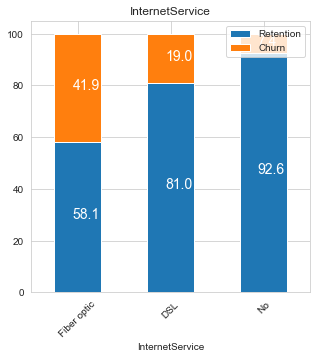

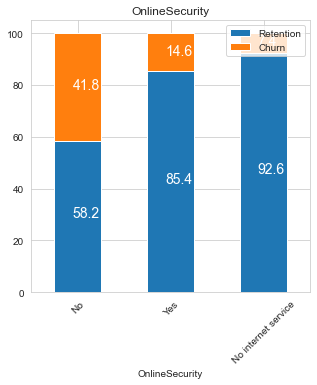

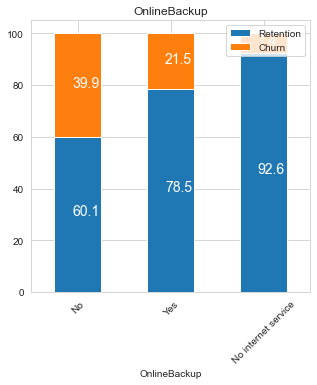

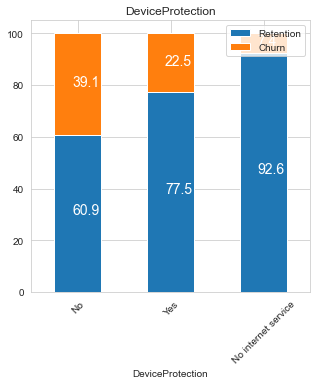

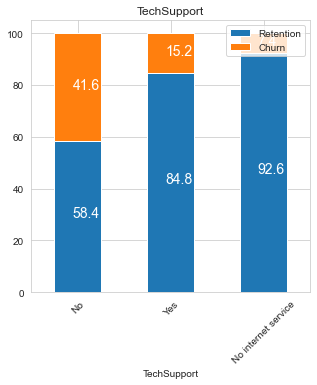

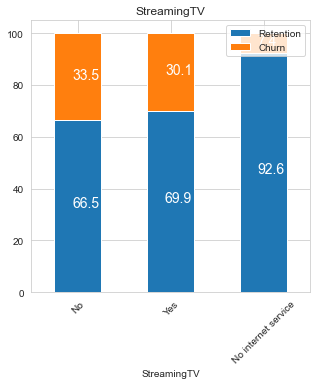

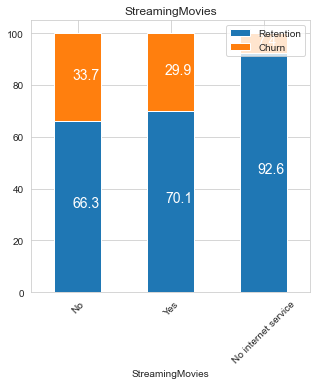

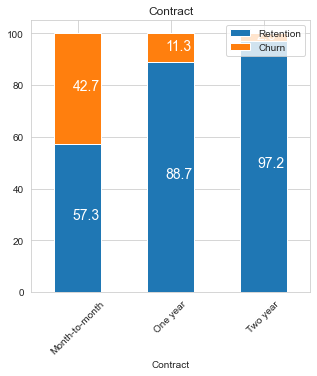

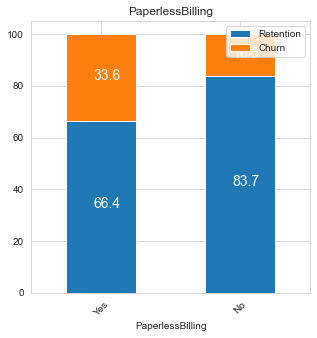

In [55]:
for col_name in categorical_features.columns[1:15]:

    df=categorical_features.groupby([categorical_features[col_name], categorical_features["Churn"]])["customerID"].count().unstack(level = 1)
    df_p=(df.div(df.sum(axis="columns"), axis="index")*100).sort_values(by=["Yes"], ascending = False)
    plot_stacked_bar(df_p, col_name,(5,5),45,legend_="upper right" )

plt.show()


From the above images we can see that:
1. gender doesn't affect the churn rate
2. without partner have higher churn rate
3. without dependent have higher churn rate
4. PhoneService don't have much differences
5. with multiple lines have slightly higher churn rate, but not much difference
6. with Fiber optic internet service have higher churn rate
7. without online security have higher churn, and No internet service sounds like no security, need to confirm this variable
8. without online backup have higher churn 
9. no device protection have higher churn
10. no tech support have higher churn
11. no streaming TV have higher churn
12. no streaming movie have higher churn
13. no contract have higher churn
14. with paperless Bill have higher churn

### Numerical Features Data Understanding

Text(0, 0.5, 'Count')

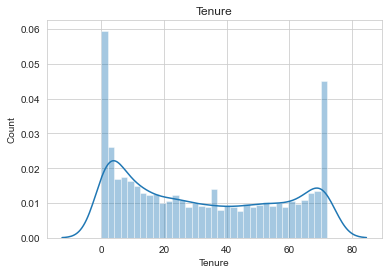

In [13]:
sns.set_style("whitegrid")
sns.distplot(train['tenure'], hist = True, bins=35)
plt.title("Tenure")
plt.xlabel("Tenure")
plt.ylabel("Count")

In [60]:
def plt_distribution(dataframe, col):
#     fig,ax=plt.subplots(figsize=(6,4))
    temp = pd.DataFrame({"Retention": dataframe[dataframe["Churn"]=="No"][col],
                        "Churn": dataframe[dataframe["Churn"]=="Yes"][col]})

    temp[["Retention", "Churn"]].plot(kind="hist", bins = 35,  stacked = True)
    temp[["Retention", "Churn"]].plot(kind="kde")
    plt.xlabel(col)
#     ax.set_xlim(-20,100)
    plt.show()

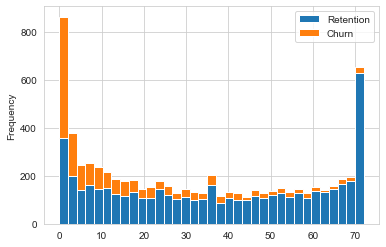

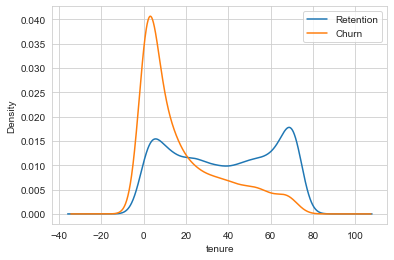

In [61]:
plt_distribution(train,"tenure" )

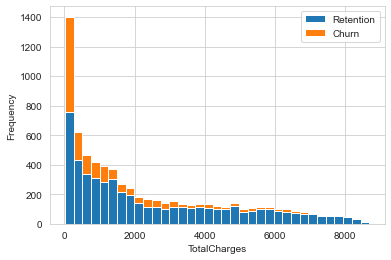

In [58]:
plt_distribution(train, "TotalCharges")

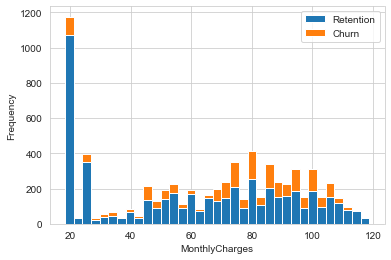

In [59]:
plt_distribution(train,"MonthlyCharges")

#### Check skewness 

In [63]:
num_features = train[["tenure", "MonthlyCharges", "TotalCharges"]]
skew_features = num_features.skew().sort_values(ascending=False)
skew_features

TotalCharges      0.961642
tenure            0.239540
MonthlyCharges   -0.220524
dtype: float64

From the graph and number above, column TotalCharges is moderately positive skewed. 0.5 < 0.96 < 1
And the other 2 is pretty close to 0, it is find to train the model with these features as they are

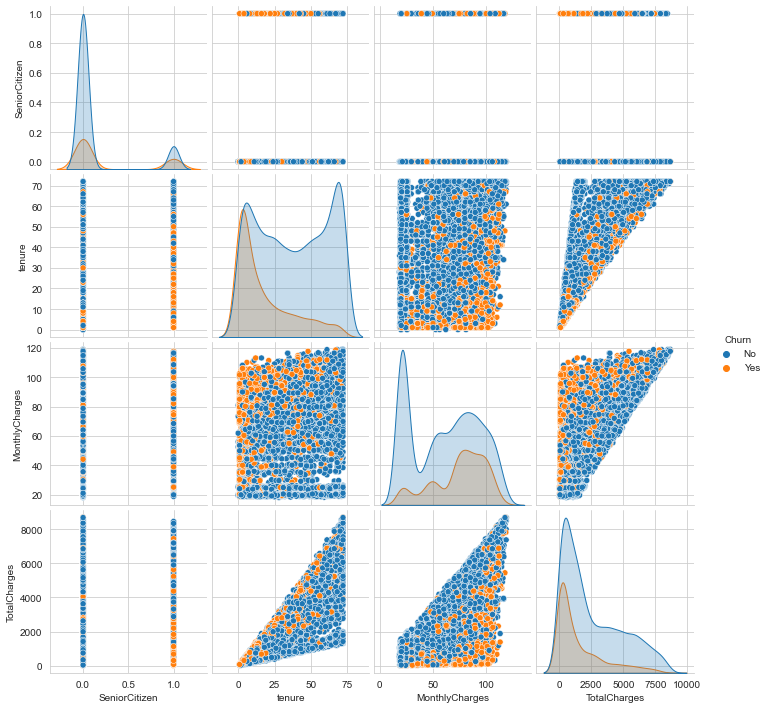

In [62]:
sns.pairplot(train,hue="Churn")

In [67]:
train.to_csv("train.csv")